In [1]:
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

In [3]:
df = pd.read_csv(url)

In [22]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,2017-01-01,Sunday,27.0,2.00,15,0.5,10
1,2017-01-02,Monday,28.9,1.33,15,0.5,13
2,2017-01-03,Tuesday,34.5,1.33,27,0.5,15
3,2017-01-04,Wednesday,44.1,1.05,28,0.5,17
4,2017-01-05,Thursday,42.4,1.00,33,0.5,18


In [21]:
df['Date']=pd.to_datetime(df.Date)

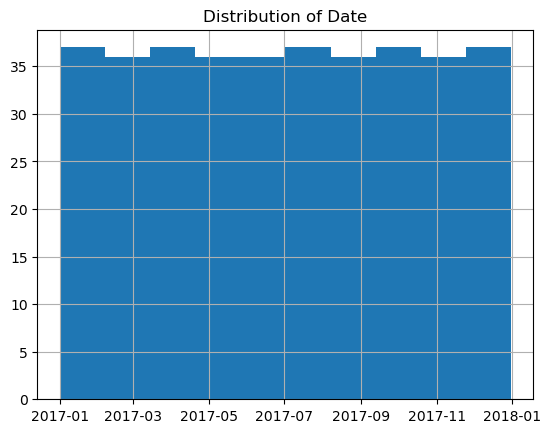

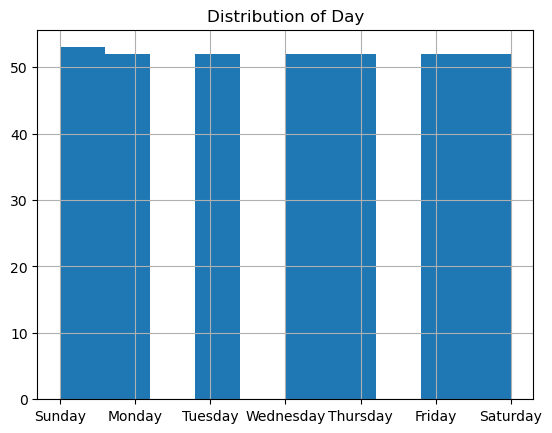

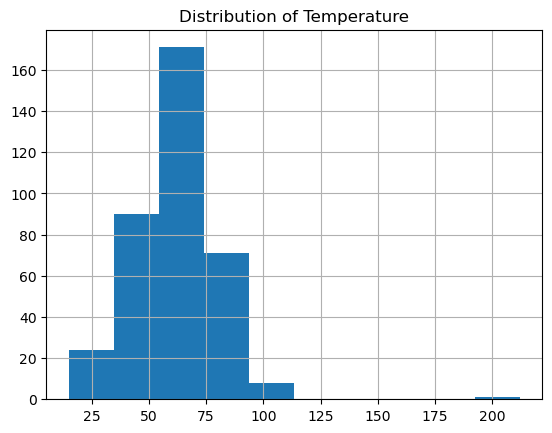

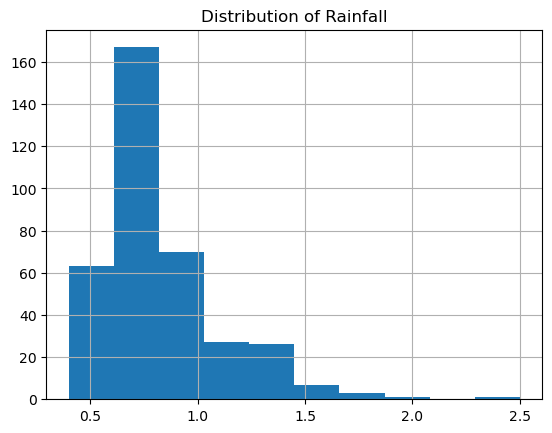

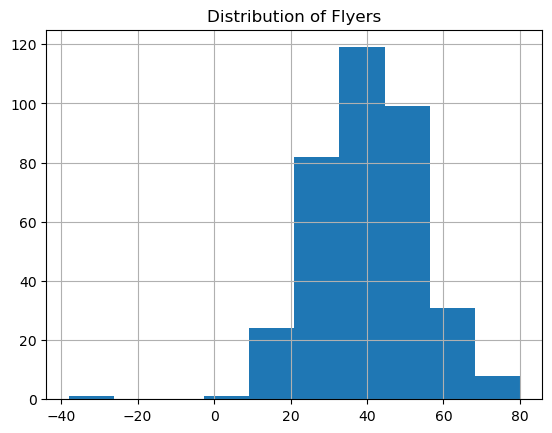

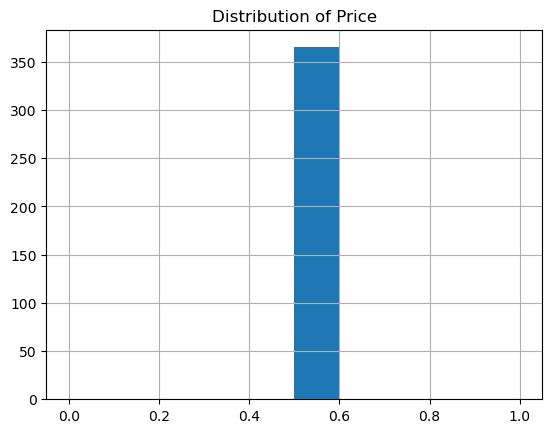

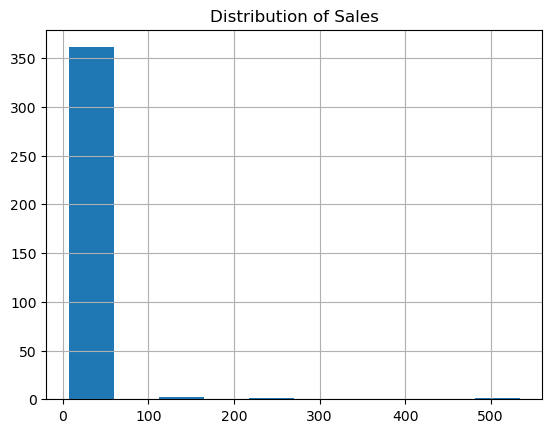

In [23]:
for col in df:
    df[col].hist()
    plt.title(f'Distribution of {col}')
    plt.show()

In [6]:
q1 = df[['Temperature','Rainfall','Flyers','Price','Sales']].quantile(.25)
q1

Temperature    49.70
Rainfall        0.65
Flyers         31.00
Price           0.50
Sales          20.00
Name: 0.25, dtype: float64

In [7]:
q3 = df[['Temperature','Rainfall','Flyers','Price','Sales']].quantile(.75)
q3

Temperature    71.70
Rainfall        0.91
Flyers         49.00
Price           0.50
Sales          30.00
Name: 0.75, dtype: float64

In [8]:
k_times_iqr = 1.5 * (q3-q1)
k_times_iqr

Temperature    33.00
Rainfall        0.39
Flyers         27.00
Price           0.00
Sales          15.00
dtype: float64

In [9]:
lower_fence = q1 - k_times_iqr
upper_fence = q3 + k_times_iqr

In [10]:
lower_fence

Temperature    16.70
Rainfall        0.26
Flyers          4.00
Price           0.50
Sales           5.00
dtype: float64

In [11]:
upper_fence 

Temperature    104.7
Rainfall         1.3
Flyers          76.0
Price            0.5
Sales           45.0
dtype: float64

In [12]:
k_times_iqr3 = 3 * (q3-q1)
k_times_iqr3

Temperature    66.00
Rainfall        0.78
Flyers         54.00
Price           0.00
Sales          30.00
dtype: float64

In [13]:
lower_fence3 = q1 - k_times_iqr3
upper_fence3 = q3 + k_times_iqr3

In [14]:
lower_fence3

Temperature   -16.30
Rainfall       -0.13
Flyers        -23.00
Price           0.50
Sales         -10.00
dtype: float64

In [15]:
upper_fence3

Temperature    137.70
Rainfall         1.69
Flyers         103.00
Price            0.50
Sales           60.00
dtype: float64

In [16]:
def get_fences(df, col, k=1.5):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1
    lower_fence = q1 - iqr*k
    upper_fence = q3 + iqr*k
    return lower_fence, upper_fence

In [18]:
get_fences(df,'Temperature')

(16.700000000000003, 104.7)

In [24]:
get_fences(df,'Rainfall')

(0.26, 1.3)

In [25]:
get_fences(df,'Flyers')

(4.0, 76.0)

In [26]:
get_fences(df,'Price')

(0.5, 0.5)

In [27]:
get_fences(df,'Sales')

(5.0, 45.0)

In [28]:
def get_fence(df, col, k=3):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1
    lower_fence = q1 - iqr*k
    upper_fence = q3 + iqr*k
    return lower_fence, upper_fence

In [29]:
get_fence(df,'Temperature')

(-16.299999999999997, 137.7)

In [30]:
get_fence(df,'Rainfall')

(-0.13, 1.69)

In [31]:
get_fence(df,'Flyers')

(-23.0, 103.0)

In [32]:
get_fence(df,'Price')

(0.5, 0.5)

In [33]:
get_fence(df,'Sales')

(-10.0, 60.0)